In [5]:

import numpy as np
import cv2
import os
from sklearn.preprocessing import PolynomialFeatures
import skimage.measure

from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import joblib

In [6]:
filters[11]

NameError: name 'filters' is not defined

In [34]:
def preProcessing(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    imthr = 90
    img[img>imthr] = 255
    img[img<=imthr] = 0
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, (4, 4))
    kernel = np.ones((3,3),np.uint8)
    erosion = cv2.erode(img,kernel,iterations = 3)
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, (3, 3))
    img = img/255.
    return img

def extractor(sample):
    img = sample.reshape((32, 32))
    fd = list()
    fd += hog(img, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(8, 8)).tolist()
    return fd

def myHog(features):
    list_hog_fd = []
    for feature in features:
        img = feature.reshape((32, 32))
        fd = extractor(feature)
        list_hog_fd.append(fd)
    return np.array(list_hog_fd, 'float64')
   


In [8]:
test = np.array([[1,2,3],[4,5,6],[7,8,9]], dtype=float)
filt = np.array([[1,0,1],
                 [1,0,1],
                 [1,0,1]], dtype=float)
print(test.shape, filt.shape)
res = cv2.filter2D(test, -1, filt)
print(res)

(3, 3) (3, 3)
[[24. 24. 24.]
 [30. 30. 30.]
 [36. 36. 36.]]


In [9]:
l = [1,2]
b = [1,2]
l+b

[1, 2, 1, 2]

In [10]:
path = 'myData'
testRatio = 0.2
valRatio = 0.2
imageDimensions= (32,32,3)

In [11]:
images = []
classNo = []
myList = os.listdir(path)
print("Total No of Classes Detected", len(myList))
noOfClasses = len(myList)
print("Importing Classes ......")
for x in range(0, noOfClasses):
    myPicList = os.listdir(path + "/" + str(x))
    for y in myPicList:
        curImg = cv2.imread(path + "/" + str(x) + "/" + y)
        curImg = cv2.resize(curImg, (imageDimensions[0], imageDimensions[1]))
        images.append(curImg)
        classNo.append(x)
    print(x, end=" ")
print(" ")

Total No of Classes Detected 10
Importing Classes ......
0 1 2 3 4 5 6 7 8 9  


In [24]:
images = np.array(images)
classNo = np.array(classNo)
print(images.shape)

(10423, 32, 32, 3)


In [25]:
X_train,X_test,y_train,y_test = train_test_split(images,classNo,test_size=testRatio)
X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=valRatio)
print(X_train.shape)
print(X_test.shape)
print(X_validation.shape)

(6670, 32, 32, 3)
(2085, 32, 32, 3)
(1668, 32, 32, 3)


In [26]:
numOfSamples= []
for x in range(0,noOfClasses):
    # print(len(np.where(y_train==x)[0]))
    numOfSamples.append(len(np.where(y_train==x)[0]))

print(numOfSamples)

[677, 654, 680, 626, 663, 671, 659, 666, 703, 671]


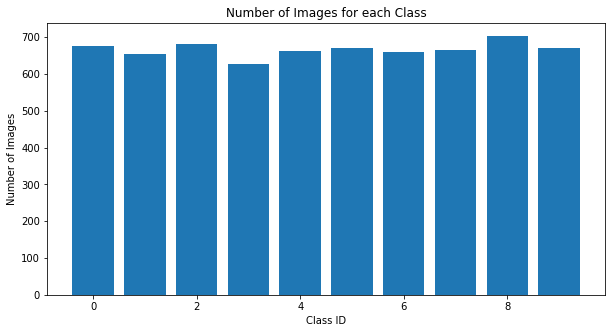

(32, 32, 3)


In [27]:
plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses),numOfSamples)
plt.title("Number of Images for each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()
print(X_train[30].shape)

In [28]:
X_train= np.array(list(map(preProcessing,X_train)))
X_test= np.array(list(map(preProcessing,X_test)))
X_validation= np.array(list(map(preProcessing,X_validation)))

In [29]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)

In [30]:
X_train.shape

(6670, 32, 32, 1)

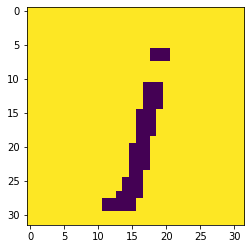

In [31]:
plt.imshow(X_train[240])

In [35]:
hog_X_train = myHog(X_train)
hog_X_test = myHog(X_test)
hog_X_validation = myHog(X_validation)

In [36]:
hog_X_train.shape

(6670, 512)

In [37]:
#for i in range(10):
my_svm = svm.SVC()
clf = CalibratedClassifierCV(my_svm)
clf.fit(hog_X_train,y_train)
"""
    clf.predict(hog_X_validation)
    predicted = clf.predict(hog_X_test)
    expected = y_test
    print(accuracy_score(expected,predicted))
    joblib.dump(clf, "model_trained_wocap.pkl", compress=3)
    """

'\n    clf.predict(hog_X_validation)\n    predicted = clf.predict(hog_X_test)\n    expected = y_test\n    print(accuracy_score(expected,predicted))\n    joblib.dump(clf, "model_trained_wocap.pkl", compress=3)\n    '

In [38]:
clf.predict(hog_X_validation)
predicted = clf.predict(hog_X_test)
expected = y_test
print(accuracy_score(expected,predicted))

0.9606714628297363


In [39]:
joblib.dump(clf, "model_trained_wocap_01.pkl", compress=3)

['model_trained_wocap_01.pkl']